Notebook elaborado para apresentar de sismicidade global.
Criado para a disciplina Geofísica I da Universidade Federal de Uberlândia.
O uso e a reprodução são livres para fins educacionais, pede-se apenas a citação da fonte.

[![License: GPL v3](https://img.shields.io/badge/License-GPLv3-blue.svg)](https://www.gnu.org/licenses/gpl-3.0)

Os dados utilizados nesta demonstração foram obtidos através do catálogo de eventos do [Serviço Geológico dos Estados Unidos (USGS)](https://earthquake.usgs.gov/earthquakes/search/)

Prof. Dr. Emerson Rodrigo Almeida<br>
Universidade Federal de Uberlândia<br>
Instituto de Geografia - Curso de Geologia<br>
emerson.almeida@ufu.br<br>



<p>&nbsp;</p>
Última modificação: 06/05/2021

# Instruções iniciais

Neste notebook você irá observar uma série de eventos sísmicos ocorridos ao redor do mundo nos últimos 50 anos. Apenas os eventos com magnitude acima de 5.0 serão mostrados, para facilitar a visualização das imagens. Leia atentamente as instruções apresentadas antes de cada célula e execute-as uma a uma, para acompanhar o processo corretamente.

Não se preocupe em compreender o código em si, não é obrigatório que você conheça a programação para obter e interpretar os resultados da demonstração. Mesmo assim, sinta-se livre caso queira perguntar qualquer coisa para aprender mais sobre o código e sua elaboração.

<p>&nbsp;</p>

### Passo 01 - Preparação

Primeiramente vamos preparar o notebook com os módulos e funções que precisaremos no decorrer da demonstração. A célula abaixo contém as funções utilizadas nos cálculos e as funções utilizadas para gerar as figuras. Execute-a uma vez antes de executar qualquer outra parte do código e **não altere nada no código apresentado na célula** para não criar problemas na execução do código.

Você pode executar o código na célula clicando sobre ela e em seguida clicando no botão **RUN** na barra do Jupyter Notebook ou pressionando as teclas **SHIFT+ENTER** no seu teclado.

<p>&nbsp;</p>

**Importante!** Nem todas as células irão retornar algum tipo de mensagem ou figura após a execução. Isto é normal e não significa que a execução tenha falhado. Perceba o símbolo **In [   ]:** próximo ao canto superior esquerdo de cada célula. Ao iniciar a execução de uma delas você verá um asterisco ($*$) aparecer dentro dos colchetes. Você saberá que a execução ocorreu sem problemas quando o $*$ dentro dos colchetes for substituído por um número e nenhuma mensagem de erro aparecer abaixo da célula executada. 

In [12]:
# imports e funções

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature

### Passo 02 - Carregar os dados

Esta demonstração utilizará dados carregados a partir de um arquivo ASCII em formato .csv contendo uma tabela com os eventos de magnitude acima de 5.0 registrados no catálogo da USGS entre janeiro de 1971 e março de 2021. Execute a célula abaixo para carregar este arquivo.

In [13]:
usgs = pd.read_csv("usgs.csv", sep='\t', decimal=".")

### Passo 03 - Epicentros



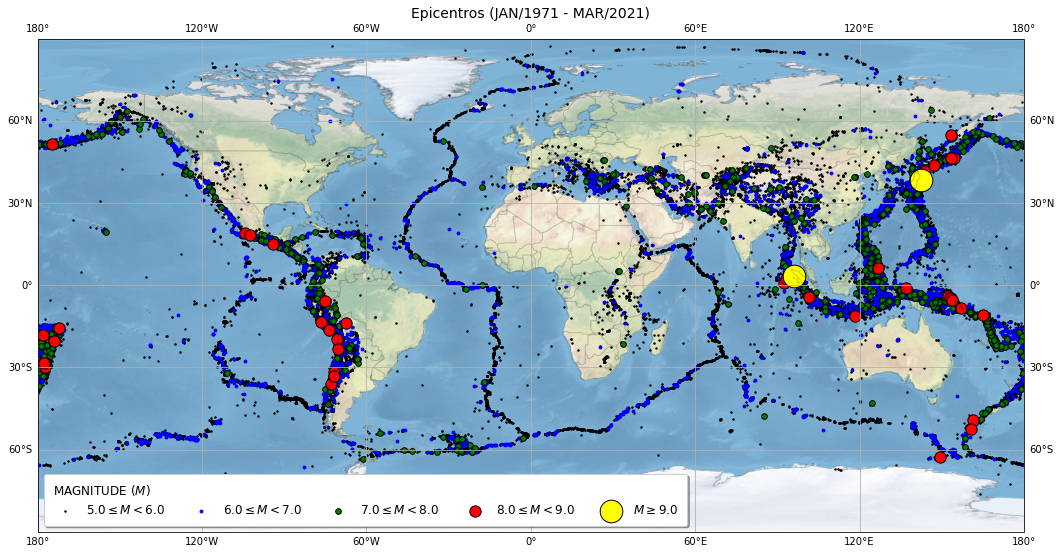

In [15]:
cl = 00

m50_59 = usgs.loc[(usgs['mag'] >=5.0) & (usgs['mag'] < 6.0)]
m60_69 = usgs.loc[(usgs['mag'] >=6.0) & (usgs['mag'] < 7.0)]
m70_79 = usgs.loc[(usgs['mag'] >=7.0) & (usgs['mag'] < 8.0)]
m80_89 = usgs.loc[(usgs['mag'] >=8.0) & (usgs['mag'] < 9.0)]
m90 = usgs.loc[(usgs['mag'] >=9.0)]

fig = plt.figure(figsize=(14, 8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=cl))
ax.stock_img()

ax.scatter(m50_59['longitude']-cl, m50_59['latitude'], s=2**1, c='black', label=r'$5.0 \leq M < 6.0$')
ax.scatter(m60_69['longitude']-cl, m60_69['latitude'], s=2**3, c='blue', label=r'$6.0 \leq M < 7.0$')
ax.scatter(m70_79['longitude']-cl, m70_79['latitude'], edgecolors='k', s=2**5, c='green', label=r'$7.0 \leq M < 8.0$')
ax.scatter(m80_89['longitude']-cl, m80_89['latitude'], edgecolors='k', s=2**7, c='r', label=r'$8.0 \leq M < 9.0$')
ax.scatter(m90['longitude']-cl, m90['latitude'], edgecolors='k', s=2**9, c='yellow', label=r'$M \geq 9.0$')

leg = ax.legend(loc='lower left', ncol=5, fontsize='large', shadow=True, borderpad=0.75, title=r'MAGNITUDE ($M$)', title_fontsize=12)
leg._legend_box.align = "left"


ax.coastlines(resolution='50m', alpha=0.20)
ax.add_feature(feature.BORDERS, linestyle='-', alpha=0.20)
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)

ax.set_title('Epicentros (JAN/1971 - MAR/2021)', fontsize=14)

plt.tight_layout()
plt.show()

Você consegue perceber algum parão na localização dos epicentros de maiores magnitudes?

### Passo 04 - Hipocentros



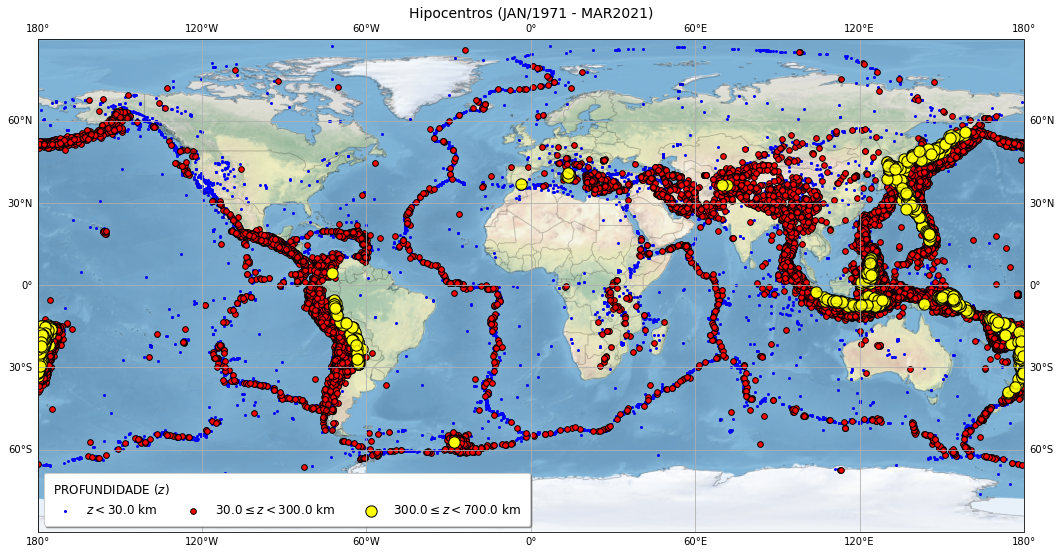

In [16]:
m30 = usgs.loc[(usgs['depth'] <=30)]
m300 = usgs.loc[(usgs['depth'] > 30.0) & (usgs['depth'] <= 300.0)]
m700 = usgs.loc[(usgs['depth'] > 300.0) & (usgs['depth'] <= 700.0)]

fig = plt.figure(figsize=(14, 8))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=cl))
ax.stock_img()

ax.scatter(m30['longitude']-cl, m30['latitude'], s=2**2, c='blue', label=r'$z < 30.0$ km')
ax.scatter(m300['longitude']-cl, m300['latitude'], edgecolors='k', s=2**5, c='red', label=r'$30.0 \leq z < 300.0$ km')
ax.scatter(m700['longitude']-cl, m700['latitude'], edgecolors='k', s=2**7, c='yellow', label=r'$300.0 \leq z < 700.0$ km')

leg = ax.legend(loc='lower left', ncol=3, fontsize='large', shadow=True, borderpad=0.75, title=r'PROFUNDIDADE ($z$)', title_fontsize=12)
leg._legend_box.align = "left"

ax.coastlines(resolution='50m', alpha=0.20)
ax.add_feature(feature.BORDERS, linestyle='-', alpha=0.20)
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)

ax.set_title('Hipocentros (JAN/1971 - MAR2021)', fontsize=14)

plt.tight_layout()
plt.show()

Você percebe algum padrão em relação à profundidade em que os eventos ocorreram, comparando esta informação com o mapa de Epicentros?

### Passo 05 - América do Sul

C:\Users\emerson.almeida\.conda\envs\demoaulasnb\lib\site-packages\ipykernel_launcher.py:53: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


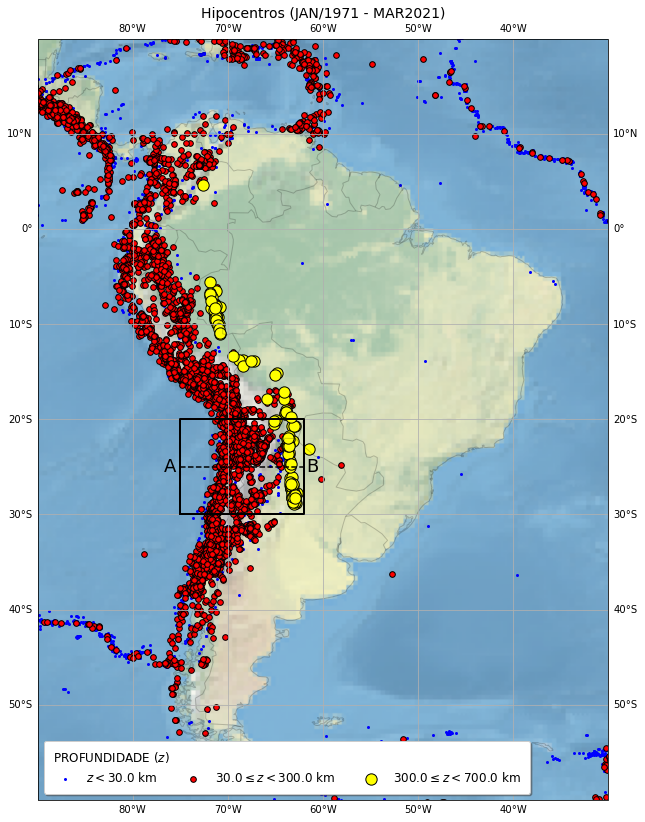

In [23]:
lon_min, lon_max = [-90.0, -30.0]
lat_min, lat_max = [-60.0, 20.0]

#lon_min_box, lon_max_box = [-80.0, -60.0]
#lat_min_box, lat_max_box = [-40.0, -30.0]

lon_min_box, lon_max_box = [-75.0, -62.0]
lat_min_box, lat_max_box = [-30.0, -20.0]

#lon_min_box, lon_max_box = [-85.0, -70.0]
#lat_min_box, lat_max_box = [-10.0, 000.0]



m30 = usgs.loc[(usgs['depth'] <=30)]
m300 = usgs.loc[(usgs['depth'] > 30.0) & (usgs['depth'] <= 300.0)]
m700 = usgs.loc[(usgs['depth'] > 300.0) & (usgs['depth'] <= 700.0)]

fig = plt.figure(figsize=(11,14))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=cl))
ax.stock_img()

ax.scatter(m30['longitude']-cl, m30['latitude'], s=2**2, c='blue', label=r'$z < 30.0$ km')
ax.scatter(m300['longitude']-cl, m300['latitude'], edgecolors='k', s=2**5, c='red', label=r'$30.0 \leq z < 300.0$ km')
ax.scatter(m700['longitude']-cl, m700['latitude'], edgecolors='k', s=2**7, c='yellow', label=r'$300.0 \leq z < 700.0$ km')
ax.plot([lon_min_box, lon_max_box], \
        [lat_min_box + (lat_max_box - lat_min_box)/2, lat_min_box + (lat_max_box - lat_min_box)/2], \
        '--k', linewidth=1.5)

ax.plot([lon_min_box, lon_min_box, lon_max_box, lon_max_box, lon_min_box],
        [lat_min_box, lat_max_box, lat_max_box, lat_min_box, lat_min_box], 'k', linewidth=2)


ax.text(lon_min_box + lon_min_box*0.015, lat_min_box + (lat_max_box - lat_min_box)/2, 'A', \
        horizontalalignment='center', verticalalignment='center', fontsize=18)

ax.text(lon_max_box - lon_max_box*0.015, lat_min_box + (lat_max_box - lat_min_box)/2, 'B', \
        horizontalalignment='center', verticalalignment='center', fontsize=18)


leg = ax.legend(loc='lower left', ncol=3, fontsize='large', shadow=True, borderpad=0.75, title=r'PROFUNDIDADE ($z$)', title_fontsize=12)
leg._legend_box.align = "left"

ax.set_xlim(lon_min, lon_max)
ax.set_ylim(lat_min, lat_max)

ax.coastlines(resolution='50m', alpha=0.20)
ax.add_feature(feature.BORDERS, linestyle='-', alpha=0.20)
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)

ax.set_title('Hipocentros (JAN/1971 - MAR2021)', fontsize=14)

plt.tight_layout()
plt.show()

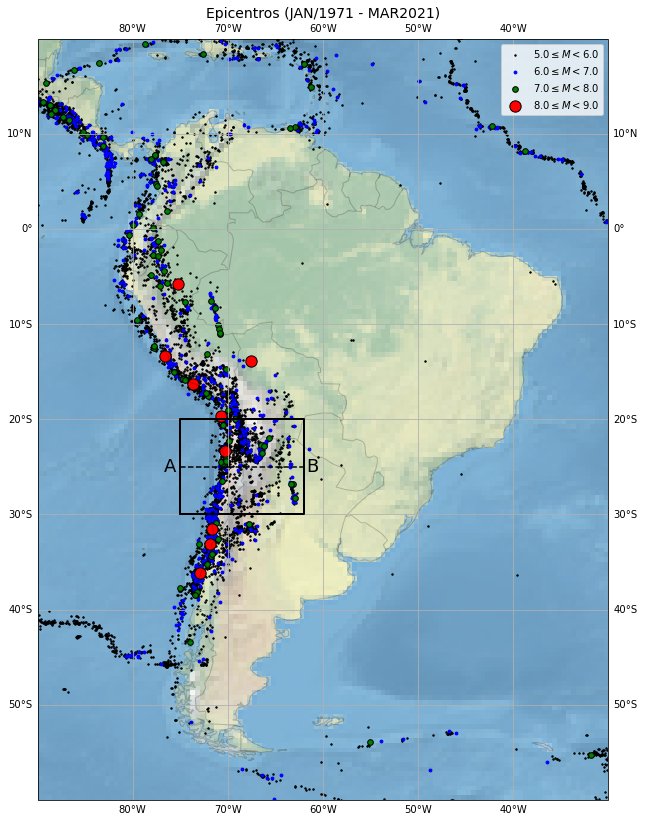

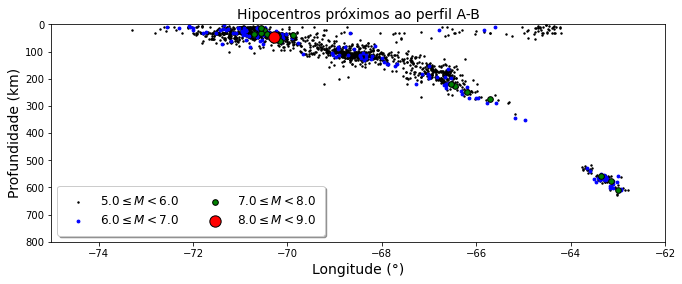

In [24]:
crop = usgs.loc[(usgs['longitude'] >= lon_min_box) &
                (usgs['longitude'] <= lon_max_box) &
                (usgs['latitude'] >= lat_min_box) &
                (usgs['latitude'] <= lat_max_box)]

m50_59_crop = crop.loc[(usgs['mag'] >=5.0) & (usgs['mag'] < 6.0)]
m60_69_crop = crop.loc[(usgs['mag'] >=6.0) & (usgs['mag'] < 7.0)]
m70_79_crop = crop.loc[(usgs['mag'] >=7.0) & (usgs['mag'] < 8.0)]
m80_89_crop = crop.loc[(usgs['mag'] >=8.0) & (usgs['mag'] < 9.0)]
m90_crop = crop.loc[(usgs['mag'] >=9.0)]



fig, ax = plt.subplots(figsize=(11, 14))
ax = plt.subplot(projection=ccrs.PlateCarree())
ax.stock_img()
ax.scatter(m50_59['longitude']-cl, m50_59['latitude'], s=2**1, c='black', label=r'$5.0 \leq M < 6.0$')
ax.scatter(m60_69['longitude']-cl, m60_69['latitude'], s=2**3, c='blue', label=r'$6.0 \leq M < 7.0$')
ax.scatter(m70_79['longitude']-cl, m70_79['latitude'], edgecolors='k', s=2**5, c='green', label=r'$7.0 \leq M < 8.0$')
ax.scatter(m80_89['longitude']-cl, m80_89['latitude'], edgecolors='k', s=2**7, c='r', label=r'$8.0 \leq M < 9.0$')
ax.plot([lon_min_box, lon_max_box], \
        [lat_min_box + (lat_max_box - lat_min_box)/2, lat_min_box + (lat_max_box - lat_min_box)/2], \
        '--k', linewidth=1.5)

ax.plot([lon_min_box, lon_min_box, lon_max_box, lon_max_box, lon_min_box],
        [lat_min_box, lat_max_box, lat_max_box, lat_min_box, lat_min_box], 'k', linewidth=2)

ax.text(lon_min_box + lon_min_box*0.015, lat_min_box + (lat_max_box - lat_min_box)/2, 'A', \
        horizontalalignment='center', verticalalignment='center', fontsize=18)

ax.text(lon_max_box - lon_max_box*0.015, lat_min_box + (lat_max_box - lat_min_box)/2, 'B', \
        horizontalalignment='center', verticalalignment='center', fontsize=18)

ax.set_xlim([lon_min, lon_max])
ax.set_ylim([lat_min, lat_max])
ax.coastlines(resolution='50m', alpha=0.20)
ax.add_feature(feature.BORDERS, linestyle='-', alpha=0.20)
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
ax.set_title('Epicentros (JAN/1971 - MAR2021)', fontsize=14)
ax.legend()


fig, ax = plt.subplots(figsize=(11, 4))
ax.scatter(m50_59_crop['longitude']-cl, m50_59_crop['depth'], s=2**1, c='black', label=r'$5.0 \leq M < 6.0$')
ax.scatter(m60_69_crop['longitude']-cl, m60_69_crop['depth'], s=2**3, c='blue', label=r'$6.0 \leq M < 7.0$')
ax.scatter(m70_79_crop['longitude']-cl, m70_79_crop['depth'], edgecolors='k', s=2**5, c='green', label=r'$7.0 \leq M < 8.0$')
ax.scatter(m80_89_crop['longitude']-cl, m80_89_crop['depth'], edgecolors='k', s=2**7, c='r', label=r'$8.0 \leq M < 9.0$')
ax.legend(ncol=2, fontsize='large', shadow=True, borderpad=0.75)
ax.set_xlabel('Longitude (°)', fontsize=14)
ax.set_ylabel('Profundidade (km)', fontsize=14)
ax.set_xlim([lon_min_box, lon_max_box])
ax.set_ylim([0, 800])
ax.invert_yaxis()
ax.set_title('Hipocentros próximos ao perfil A-B', fontsize=14)

plt.show()

O que isso te diz sobre o comportamento das placas? Modifique a área através da qual passa o perfil A-B e verifique se este comportamento se repete.